In [1]:
import sys
sys.path.append('../')
import utils
import model
import numpy as np 
import matplotlib.pyplot as plt 

import tensorflow as tf 
 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

model, x_test, y_test = model.train(epochs=100, batch_size=10)

Using TensorFlow backend.
1 Physical GPUs, 1 Logical GPUs
num of train data =  251
num of val data =  251
batch size =  10
epochs =  3
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 16)    448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, None, 16)    0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 8)     1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, None, None, 8)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 8)     5

In [36]:
import cv2

index = 1 
x_text_img = cv2.imread(x_test[index]) / 255.0    
y_test_img = cv2.imread(y_test[index]) / 255.0
x_text_img = np.expand_dims(x_text_img, axis=0)


In [37]:
result = model.predict(x_text_img)

Text(0.5, 1.0, 'gt')

<Figure size 432x288 with 0 Axes>

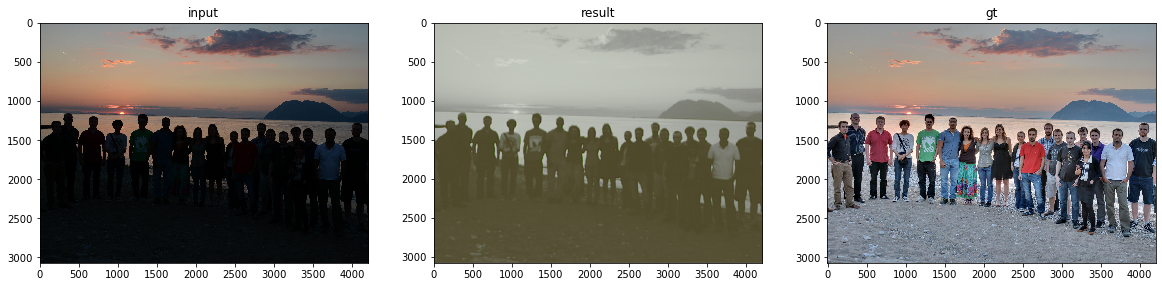

In [39]:
result_rgb = result.squeeze()[:,:,::-1]
x_test_img_rgb = x_text_img.squeeze()[:,:,::-1]
y_test_img_rgb = y_test_img[:,:,::-1]

plt.figure() 
fig, axs = plt.subplots(1, 3,figsize = (20,13))
axs[0].imshow(x_test_img_rgb)
axs[0].set_title('input')
axs[1].imshow(result_rgb)
axs[1].set_title('result')
axs[2].imshow(y_test_img_rgb)
axs[2].set_title('gt')

In [27]:
result.shape

(2592, 3872, 3)